In [43]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


dataset = np.load("assets/new_data_preprocessed_30bands.npz", allow_pickle=True)

image = dataset['image']
labels = dataset['labels']

le = LabelEncoder()
encoded_labels = le.fit_transform(labels.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(image, encoded_labels, test_size=0.2, random_state=42,stratify=labels)

num_samples, height, width, channels = X_train.shape


# class_counts = np.bincount(y_train)
# total_samples = len(y_train)
# class_weights = 1.0 / (class_counts/ total_samples) 

X_train = np.reshape(X_train, (num_samples, height * width * channels))

num_samples, height, width, channels = X_test.shape

X_test = np.reshape(X_test, (num_samples, height * width * channels))

c:\Users\USER\anaconda3\envs\DSEO_project\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
rf = RandomForestClassifier(n_estimators=500, criterion='gini', class_weight='balanced')

print(y_train[0])
rf.fit(X_train,y_train)

2


RandomForestClassifier(class_weight='balanced', n_estimators=500)

In [45]:
y_pred = rf.predict(X_test)

0.09163473818646233
0.10629852425046189


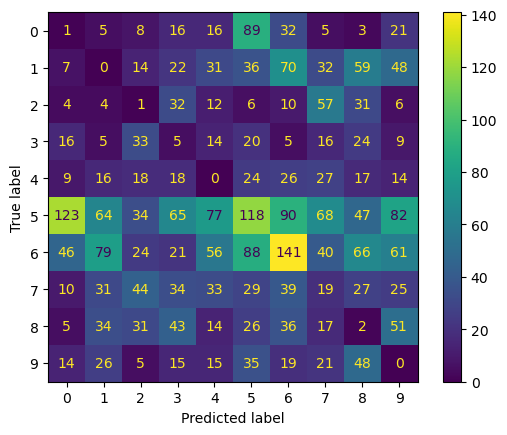

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score

%matplotlib inline

print(accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()

f1_score = f1_score(y_test, y_pred, average='weighted')

print(f1_score)


15657


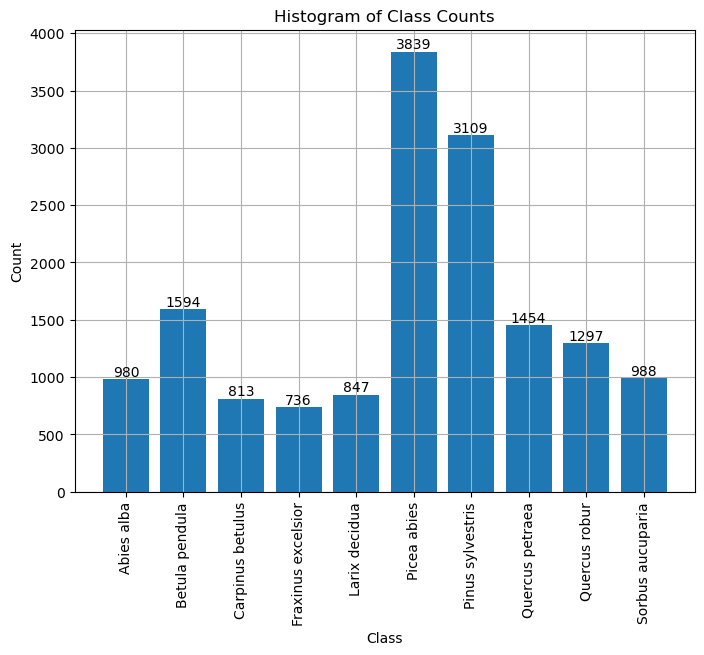

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = np.load("assets/new_data_preprocessed_30bands.npz", allow_pickle=True)

image = dataset['image']
labels = dataset['labels']
encoded = le.fit_transform(labels)

class_counts = np.bincount(encoded)

x_values = np.arange(len(class_counts))

plt.figure(figsize=(8, 6))
plt.bar(x_values, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Histogram of Class Counts')
plt.xticks(x_values, labels=le.inverse_transform(x_values), rotation='vertical')  # Set x-axis labels to class labels
for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.grid(True)
plt.show()
